In [3]:
from anypytools import AnyPyProcess
app = AnyPyProcess()
from anypytools import AnyMacro, AnyPyProcess, macro_commands as mc
from anypytools.macro_commands import Load, OperationRun, SaveData
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
macrolist = [
    [ mc.Load("GH_2spheres.main.any"),
      mc.SetValue("Main.Model.ShoulderPE.F", 0.0 + i*0.5),
      mc.OperationRun ("Main.RunApplication"),
      mc.Dump("Main.Study.Output.Abscissa.t"),
      mc.Dump("Main.Study.Output.Model.ShoulderPE.pline.Pos"),
      mc.Dump("Main.HumanModel.BodyModel.Right.ShoulderArm.Mus.deltoideus_lateral_part_3.Activity"),
      mc.SaveData('Main.Study', 'output.anydata.h5'),
     ]
    for i in range(10)
]
results = app.start_macro(macrolist)

  0%|          | 0/10 [00:00<?, ?it/s]

Failed (i=0) : 963.7 sec : fdk-healthy-shoulder-gh_contact_spheres-0_(crdnzcfj).txt
Failed (i=4) : 964.3 sec : fdk-healthy-shoulder-gh_contact_spheres-4_(n1tpjhl2).txt
Failed (i=8) : 981.3 sec : fdk-healthy-shoulder-gh_contact_spheres-8_(zybeg4dr).txt
Failed (i=3) : 982.9 sec : fdk-healthy-shoulder-gh_contact_spheres-3_(xvea_qhh).txt
Failed (i=7) : 982.9 sec : fdk-healthy-shoulder-gh_contact_spheres-7_(3bp8t45_).txt
Failed (i=1) : 985.0 sec : fdk-healthy-shoulder-gh_contact_spheres-1_(7kdv1zsl).txt
Failed (i=6) : 987.2 sec : fdk-healthy-shoulder-gh_contact_spheres-6_(7y6z4kpc).txt
Completed: 3, Failed: 7


In [3]:
df = results.to_dataframe(index_var='Main.Study.Output.Abscissa.t')

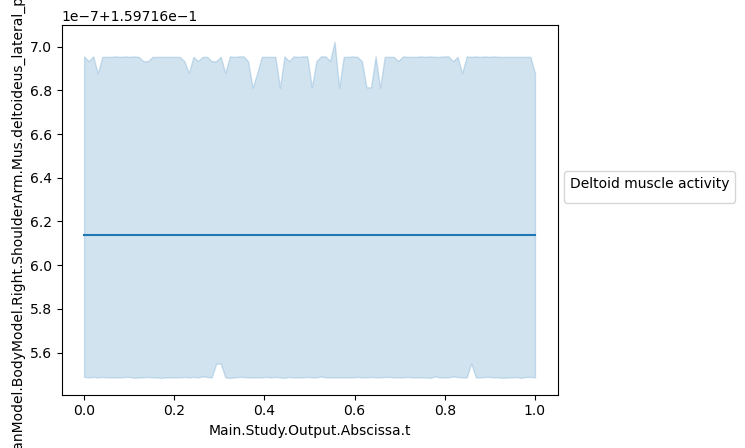

In [6]:
g = sns.lineplot(
    data=df,
    x="Main.Study.Output.Abscissa.t",
    y="Main.HumanModel.BodyModel.Right.ShoulderArm.Mus.deltoideus_lateral_part_3.Activity",
)


g.legend(title="Deltoid muscle activity", loc='lower left', bbox_to_anchor=(1, 0.5));